Linear
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000    1.0000    1.0000         9
   virginica     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Polynomial(deg=3)
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000    1.0000    1.0000         9
   virginica     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
RBF
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000   

,Accuracy,Precision_macro,Recall_macro,F1_macro
Kernel,,,,
Linear,1.0,1.0,1.0,1.0
Polynomial(deg=3),1.0,1.0,1.0,1.0
RBF,1.0,1.0,1.0,1.0


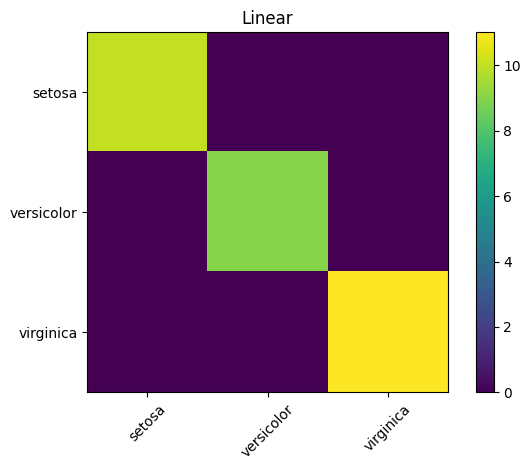

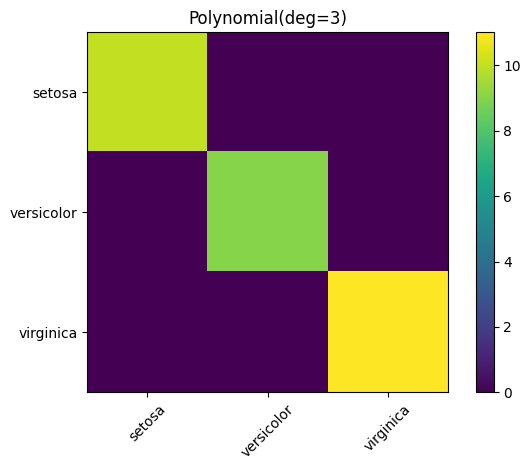

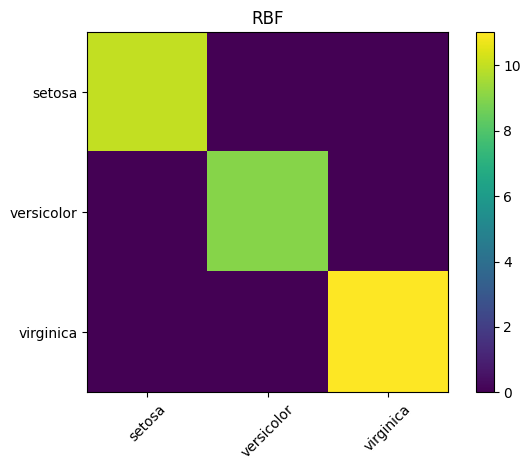

Linear
Linear


In [2]:

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from IPython.display import display

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear": SVC(kernel='linear', random_state=42),
    "Polynomial(deg=3)": SVC(kernel='poly', degree=3, random_state=42),
    "RBF": SVC(kernel='rbf', random_state=42)
}

results = []
conf_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    results.append({"Kernel": name, "Accuracy": acc, "Precision_macro": prec, "Recall_macro": rec, "F1_macro": f1})
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
    print(conf_matrices[name])

results_df = pd.DataFrame(results).set_index("Kernel")
display(results_df)

for name, cm in conf_matrices.items():
    plt.imshow(cm)
    plt.title(name)
    plt.colorbar()
    ticks = np.arange(len(target_names))
    plt.xticks(ticks, target_names, rotation=45)
    plt.yticks(ticks, target_names)
    plt.tight_layout()
    plt.show()

best_by_f1 = results_df["F1_macro"].idxmax()
best_by_acc = results_df["Accuracy"].idxmax()

print(best_by_f1)
print(best_by_acc)


In [3]:

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from IPython.display import display

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svc_unscaled = SVC(kernel='rbf', random_state=42)
svc_unscaled.fit(X_train, y_train)
y_train_pred_unscaled = svc_unscaled.predict(X_train)
y_test_pred_unscaled = svc_unscaled.predict(X_test)
train_acc_unscaled = accuracy_score(y_train, y_train_pred_unscaled)
test_acc_unscaled = accuracy_score(y_test, y_test_pred_unscaled)

svc_scaled = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))
svc_scaled.fit(X_train, y_train)
y_train_pred_scaled = svc_scaled.predict(X_train)
y_test_pred_scaled = svc_scaled.predict(X_test)
train_acc_scaled = accuracy_score(y_train, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test, y_test_pred_scaled)

results = pd.DataFrame({
    "Model": ["SVC RBF (unscaled)", "SVC RBF (StandardScaler)"],
    "Train Accuracy": [train_acc_unscaled, train_acc_scaled],
    "Test Accuracy": [test_acc_unscaled, test_acc_scaled]
}).set_index("Model")

display(results)

print(classification_report(y_test, y_test_pred_unscaled, digits=4))
print(confusion_matrix(y_test, y_test_pred_unscaled))

print(classification_report(y_test, y_test_pred_scaled, digits=4))
print(confusion_matrix(y_test, y_test_pred_scaled))


,Train Accuracy,Test Accuracy
Model,,
SVC RBF (unscaled),0.918681,0.929825
SVC RBF (StandardScaler),0.982418,0.982456


              precision    recall  f1-score   support

           0     0.9474    0.8571    0.9000        42
           1     0.9211    0.9722    0.9459        72

    accuracy                         0.9298       114
   macro avg     0.9342    0.9147    0.9230       114
weighted avg     0.9307    0.9298    0.9290       114

[[36  6]
 [ 2 70]]
              precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114

[[41  1]
 [ 1 71]]
